## Modeling Exercises - Clustering Module

---

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from pydataset import data
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import os
from env import get_db_url


In [2]:
def acquire_iris():
    '''
    This function checks for a copy of the dataset in the local directory 
    and pulls a new copy and saves it if there is not one,
    it then cleans the data by removing significant outliers then
    removing the rows with null values for 'yearbuilt'
    '''
    #assign the file name
    filename = 'iris_clustering.csv'
    #check if the file exists in the current directory and read it if it is
    if os.path.exists(filename):
        print('Reading from csv file...')
        #read the local .csv into the notebook
        df = pd.read_csv(filename)
        return df
    #assign the sql query to a variable for use in pulling a new copy of the dataset from the database
    query = '''
    SELECT * FROM measurements;
    '''
    #if needed pull a fresh copy of the dataset from the database
    print('Getting a fresh copy from SQL database...')
    df = pd.read_sql(query, get_db_url('iris_db'))
    #save a copy of the dataset to the local directory as a .csv file
    df.to_csv(filename, index=False)
    return df


In [3]:
df = acquire_iris()
df.head()

Reading from csv file...


,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [4]:
train_val, test = train_test_split(df, train_size = 0.8, random_state=123)
train, validate = train_test_split(train_val, train_size = 0.7, random_state=123)
train.shape, validate.shape, test.shape

((84, 6), (36, 6), (30, 6))

In [5]:
train.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
56,57,6.3,3.3,4.7,1.6,2
40,41,5.0,3.5,1.3,0.3,1
70,71,5.9,3.2,4.8,1.8,2
23,24,5.1,3.3,1.7,0.5,1
139,140,6.9,3.1,5.4,2.1,3


---

##### Clustering with the Iris Dataset

- Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.

- Visualize the results of your clustering.

- Use the elbow method to visually select a good value for k.

- Repeat the clustering, this time with 3 different features.

In [6]:
x = train[['petal_length', 'petal_width']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
train['cluster'] = kmeans.predict(x)

In [7]:
train.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,cluster
56,57,6.3,3.3,4.7,1.6,2,2
40,41,5.0,3.5,1.3,0.3,1,1
70,71,5.9,3.2,4.8,1.8,2,2
23,24,5.1,3.3,1.7,0.5,1,1
139,140,6.9,3.1,5.4,2.1,3,0


In [8]:
train.cluster.value_counts()

2    33
1    26
0    25
Name: cluster, dtype: int64

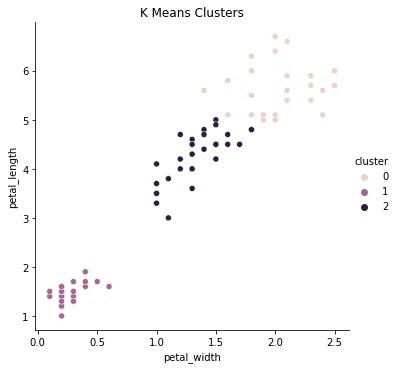

In [9]:
sns.relplot(data=train, y='petal_length', x='petal_width', hue='cluster')
plt.title('K Means Clusters')
plt.show()

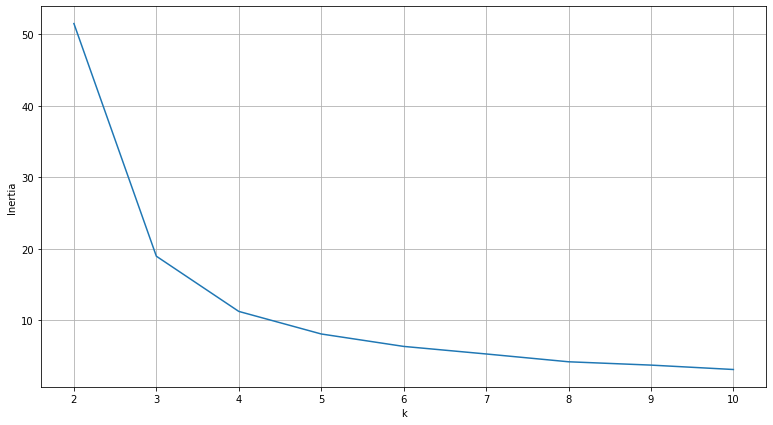

In [10]:
cols = ['petal_length', 'petal_width']
x = train[cols]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

##### Key findings:
- K values of 3 and 4 are standouts for points of futher reduced performance 

- From knowledge of the data set there are only three species of iris in the set

---

In [11]:
#the model was run ith a k value of 3 above and is run with a k value of 4 here
x = train[['petal_length', 'petal_width']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
train['cluster'] = kmeans.predict(x)

In [12]:
train.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,cluster
56,57,6.3,3.3,4.7,1.6,2,1
40,41,5.0,3.5,1.3,0.3,1,0
70,71,5.9,3.2,4.8,1.8,2,1
23,24,5.1,3.3,1.7,0.5,1,0
139,140,6.9,3.1,5.4,2.1,3,3


In [13]:
train.cluster.value_counts()

0    26
1    25
3    17
2    16
Name: cluster, dtype: int64

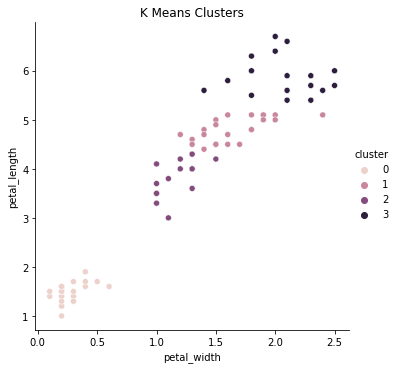

In [14]:
sns.relplot(data=train, y='petal_length', x='petal_width', hue='cluster')
plt.title('K Means Clusters')
plt.show()

---

In [15]:
#adding a third feature to the model
x = train[['petal_length', 'petal_width', 'sepal_length']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
train['cluster'] = kmeans.predict(x)

In [16]:
train.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,cluster
56,57,6.3,3.3,4.7,1.6,2,1
40,41,5.0,3.5,1.3,0.3,1,2
70,71,5.9,3.2,4.8,1.8,2,1
23,24,5.1,3.3,1.7,0.5,1,2
139,140,6.9,3.1,5.4,2.1,3,0


In [17]:
train.cluster.value_counts()

1    39
2    26
0    19
Name: cluster, dtype: int64

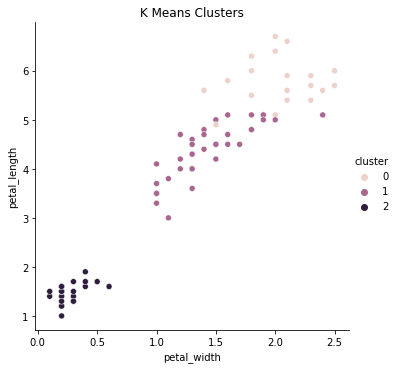

In [18]:
sns.relplot(data=train, y='petal_length', x='petal_width', hue='cluster')
plt.title('K Means Clusters')
plt.show()

---

##### Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [19]:
def acquire_mall_customers():
    '''
    This function checks for a copy of the dataset in the local directory 
    and pulls a new copy and saves it if there is not one,
    it then cleans the data by removing significant outliers then
    removing the rows with null values for 'yearbuilt'
    '''
    #assign the file name
    filename = 'mall_clustering.csv'
    #check if the file exists in the current directory and read it if it is
    if os.path.exists(filename):
        print('Reading from csv file...')
        #read the local .csv into the notebook
        df = pd.read_csv(filename)
        return df
    #assign the sql query to a variable for use in pulling a new copy of the dataset from the database
    query = '''
    SELECT * FROM customers;
    '''
    #if needed pull a fresh copy of the dataset from the database
    print('Getting a fresh copy from SQL database...')
    df = pd.read_sql(query, get_db_url('mall_customers'))
    #save a copy of the dataset to the local directory as a .csv file
    df.to_csv(filename, index=False)
    return df

In [20]:
df = acquire_mall_customers()
df.head()

Reading from csv file...


,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
train_val, test = train_test_split(df, train_size = 0.8, random_state=123)
train, validate = train_test_split(train_val, train_size = 0.7, random_state=123)
train.shape, validate.shape, test.shape

((112, 5), (48, 5), (40, 5))

In [22]:
x = train[['age', 'annual_income']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
train['cluster'] = kmeans.predict(x)

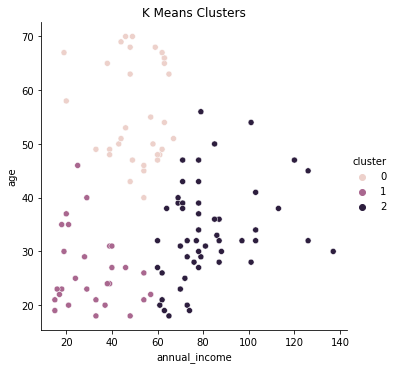

In [23]:
sns.relplot(data=train, y='age', x='annual_income', hue='cluster')
plt.title('K Means Clusters')
plt.show()

---

##### How does scaling impact the results of clustering?

- Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.



In [26]:
x_train = train[['age', 'annual_income']]

scaler = MinMaxScaler()
scaler.fit(x_train)
scaled_df = scaler.transform(x_train)
x_train_scaled = pd.DataFrame(scaled_df, columns=x_train.columns, index=x_train.index)

In [27]:
x_train_scaled.head()

,age,annual_income
123,0.403846,0.442623
76,0.519231,0.319672
171,0.192308,0.590164
10,0.942308,0.032787
35,0.057692,0.147541


In [28]:
x = x_train_scaled[['age', 'annual_income']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
x_train_scaled['cluster'] = kmeans.predict(x)

In [29]:
x_train_scaled.head()

,age,annual_income,cluster
123,0.403846,0.442623,2
76,0.519231,0.319672,1
171,0.192308,0.590164,2
10,0.942308,0.032787,1
35,0.057692,0.147541,0


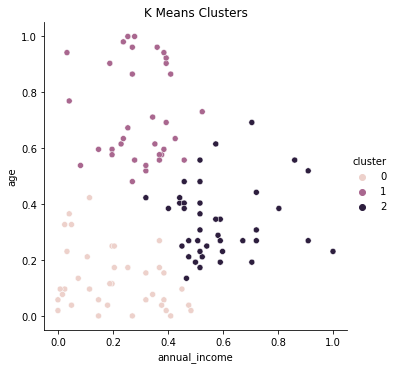

In [30]:
sns.relplot(data=x_train_scaled, y='age', x='annual_income', hue='cluster')
plt.title('K Means Clusters')
plt.show()